In [58]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv('911.csv')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [129]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [121]:
df = df.drop(['e'], axis =1)

In [130]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [131]:
df['zip'].value_counts().nlargest(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [132]:
df['twp'].value_counts().nlargest(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [133]:
df['title'].nunique()

110

In [134]:
def why_man_why(title):
    if 'EMS' in title:
        return 'EMS'    
    elif 'Fire' in title:
        return 'Fire'    
    elif 'Traffic' in title:
        return 'Traffic'

df['Reason'] =  df['title'].apply(lambda x : why_man_why(x))

In [135]:
df.head(100)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
95,40.083078,-75.101117,SHELMIRE ST & CEDAR RD; ABINGTON; 2015-12-10 @...,19027.0,Traffic: DISABLED VEHICLE -,2015-12-10 21:52:01,ABINGTON,SHELMIRE ST & CEDAR RD,1,Traffic
96,40.276304,-75.565024,SWAMP PIKE & SANATOGA RD; NEW HANOVER; 2015-12...,19525.0,Traffic: DISABLED VEHICLE -,2015-12-10 22:01:01,NEW HANOVER,SWAMP PIKE & SANATOGA RD,1,Traffic
97,40.095320,-75.193482,CHELTENHAM AVE & DELPHINE RD; SPRINGFIELD; 201...,19038.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 22:02:01,SPRINGFIELD,CHELTENHAM AVE & DELPHINE RD,1,Traffic
98,40.151476,-75.396624,MARK LN & IVY CIR; LOWER PROVIDENCE; Station ...,19403.0,EMS: CVA/STROKE,2015-12-10 22:07:02,LOWER PROVIDENCE,MARK LN & IVY CIR,1,EMS


In [136]:
df['Reason'].value_counts()

EMS        48879
Traffic    35695
Fire       14918
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

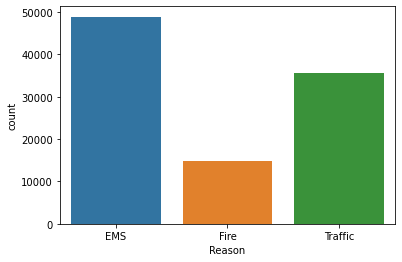

In [137]:
sns.countplot(x = 'Reason', data  = df)

In [138]:
type(df['timeStamp'][10])

str

In [139]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] =df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] =df['timeStamp'].apply(lambda x: x.day_name())

In [140]:
df.tail(35)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
99457,40.086061,-75.230478,NORTHWESTERN AVE & GERMANTOWN AVE; SPRINGFIELD...,19444.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 09:16:48,SPRINGFIELD,NORTHWESTERN AVE & GERMANTOWN AVE,1,Traffic,9,8,Wednesday
99458,40.086061,-75.230478,NORTHWESTERN AVE & GERMANTOWN AVE; SPRINGFIELD...,19444.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 09:16:48,SPRINGFIELD,NORTHWESTERN AVE & GERMANTOWN AVE,1,Traffic,9,8,Wednesday
99459,40.233713,-75.463603,HIGHLAND MANOR DR & DEAD END; PERKIOMEN; Stat...,NaN,EMS: FALL VICTIM,2016-08-24 09:27:01,PERKIOMEN,HIGHLAND MANOR DR & DEAD END,1,EMS,9,8,Wednesday
99460,40.122127,-75.383994,OVERLOOK DR & S SCHUYLKILL AVE; WEST NORRITON...,19403.0,EMS: RESPIRATORY EMERGENCY,2016-08-24 09:27:01,WEST NORRITON,OVERLOOK DR & S SCHUYLKILL AVE,1,EMS,9,8,Wednesday
99461,40.214977,-75.499712,RIDGE PIKE & N TOWNSHIP LINE RD; LIMERICK; St...,19468.0,EMS: RESPIRATORY EMERGENCY,2016-08-24 09:27:01,LIMERICK,RIDGE PIKE & N TOWNSHIP LINE RD,1,EMS,9,8,Wednesday
99462,40.274137,-75.660469,UPLAND SQUARE DR & SELL RD; WEST POTTSGROVE; ...,19464.0,EMS: UNKNOWN MEDICAL EMERGENCY,2016-08-24 09:41:00,WEST POTTSGROVE,UPLAND SQUARE DR & SELL RD,1,EMS,9,8,Wednesday
99463,40.254768,-75.660459,SHOEMAKER RD & ROBINSON ST; POTTSTOWN; Statio...,19464.0,EMS: UNKNOWN MEDICAL EMERGENCY,2016-08-24 09:42:00,POTTSTOWN,SHOEMAKER RD & ROBINSON ST,1,EMS,9,8,Wednesday
99464,40.163730,-75.082753,KAREN LN & BYBERRY RD; UPPER MORELAND; Statio...,19040.0,EMS: FALL VICTIM,2016-08-24 09:51:06,UPPER MORELAND,KAREN LN & BYBERRY RD,1,EMS,9,8,Wednesday
99465,40.114928,-75.340307,AIRY ST & GREEN ST; NORRISTOWN; Station 308A;...,19401.0,EMS: RESPIRATORY EMERGENCY,2016-08-24 09:56:13,NORRISTOWN,AIRY ST & GREEN ST,1,EMS,9,8,Wednesday
99466,40.159820,-75.288436,WENTZ RD & SILO CIR; WHITPAIN; Station 385; 2...,19422.0,EMS: NAUSEA/VOMITING,2016-08-24 10:01:00,WHITPAIN,WENTZ RD & SILO CIR,1,EMS,10,8,Wednesday


In [142]:
time = df['timeStamp'].iloc[0]
time.

SyntaxError: invalid syntax (<ipython-input-142-5aac4046b4fa>, line 2)

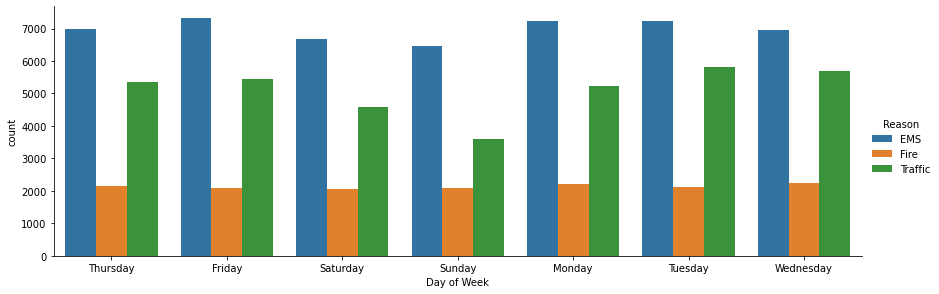

In [143]:
sns.catplot(kind = 'count', x = 'Day of Week', data =df, hue = 'Reason', height = 4, aspect = 3)

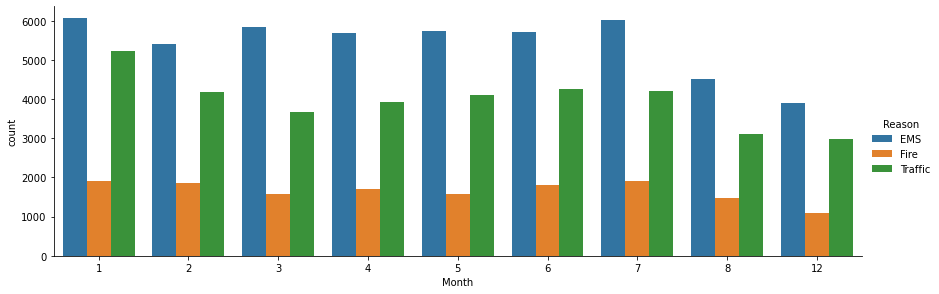

In [144]:
sns.catplot(kind = 'count', x = 'Month', data =df, hue = 'Reason', height = 4, aspect = 3)

In [145]:
df.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [172]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

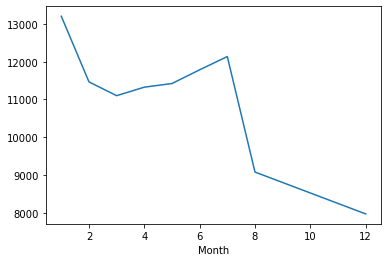

In [169]:
# Could be any column
byMonth['e'].plot()

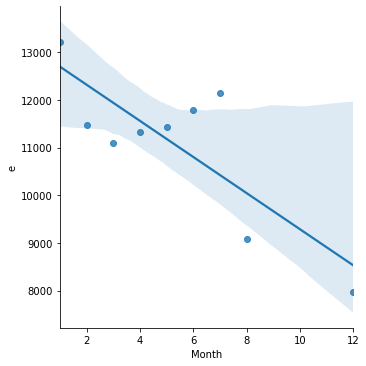

In [173]:
sns.lmplot(x = 'Month', y = 'e', data = byMonth.reset_index())

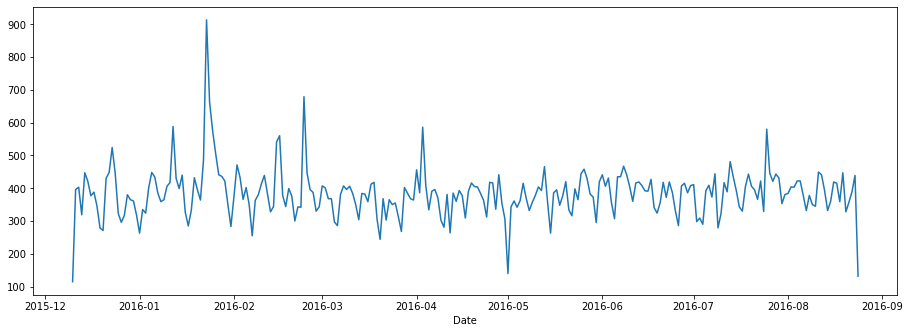

In [187]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())
plt.figure().add_axes([0.1, 0.1, 2, 1])
df.groupby('Date').count()['e'].plot()


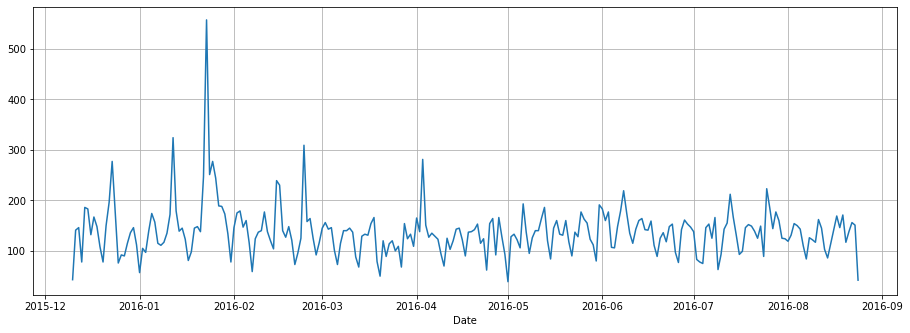

In [194]:
plt.figure().add_axes([0.1, 0.1, 2, 1])
df[df['Reason']=='Traffic'].groupby('Date').count()['Reason'].plot(grid= True)

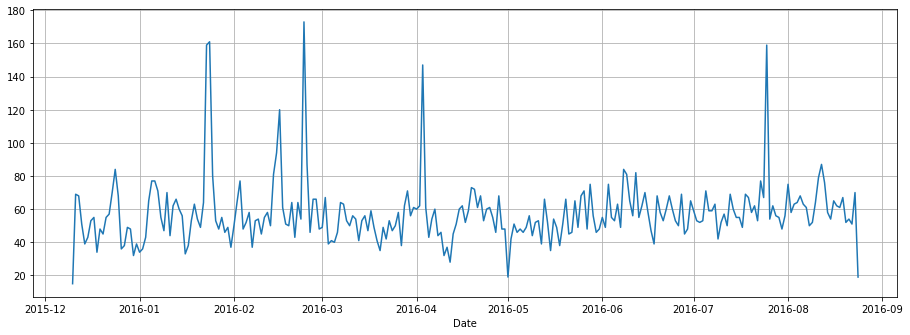

In [195]:
plt.figure().add_axes([0.1, 0.1, 2, 1])
df[df['Reason']=='Fire'].groupby('Date').count()['Reason'].plot(grid= True)

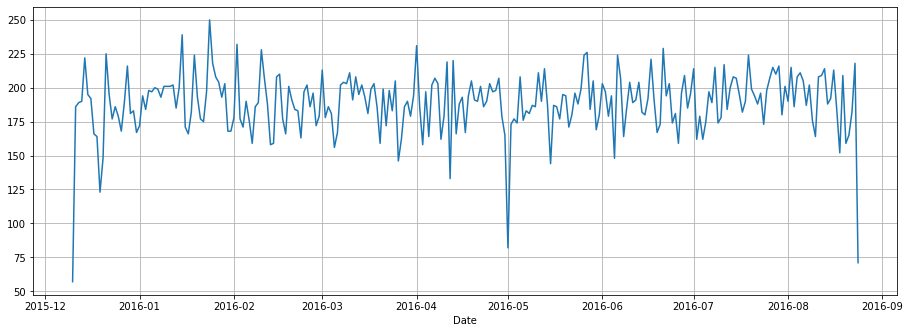

In [197]:
plt.figure().add_axes([0.1, 0.1, 2, 1])
df[df['Reason']=='EMS'].groupby('Date').count()['Reason'].plot(grid= True)

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

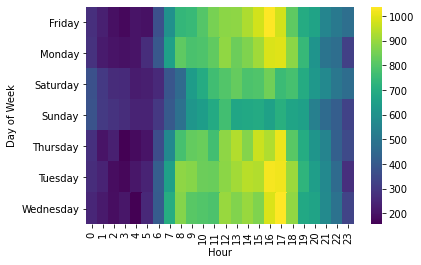

In [243]:
count = df.groupby(['Hour', 'Day of Week']).count()
pvflights = count.pivot_table(values='e',index='Day of Week',columns='Hour')
sns.heatmap(pvflights, cmap='viridis')

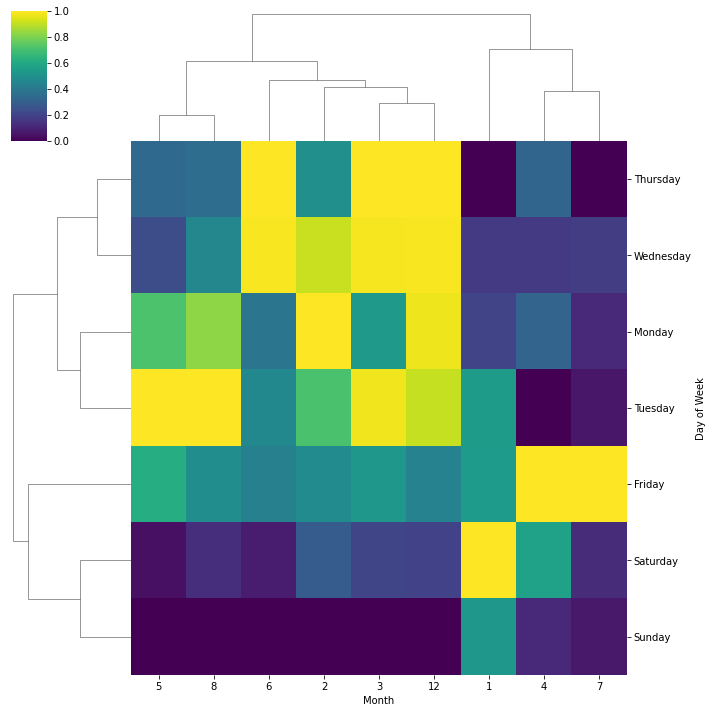

In [248]:
sns.clustermap(pvflights, cmap='viridis', standard_scale=1)

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

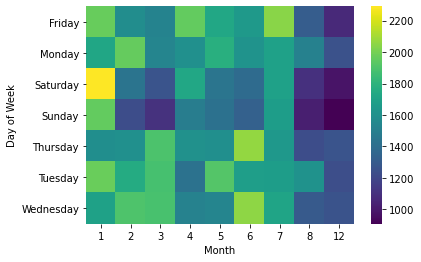

In [246]:
count = df.groupby(['Month', 'Day of Week']).count()
pvflights = count.pivot_table(values='e',index='Day of Week',columns='Month')
sns.heatmap(pvflights, cmap='viridis')

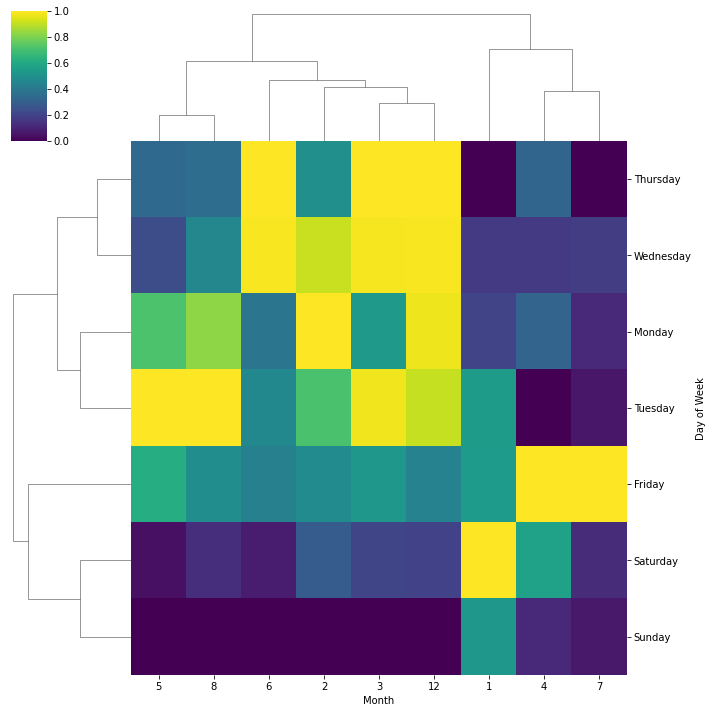

In [250]:
sns.clustermap(pvflights, cmap='viridis',standard_scale=1)